# Problem Statement : Build machine learning model that can predict quality of red wine based on different features like quality category, citric acid quantity, chlorides density etc.

# Import the required library

In [1]:
import pandas as pd  # For data analysis
import numpy as np  # For data analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline
import seaborn as sns  # For data visualization
import warnings
warnings.filterwarnings('ignore') # Ignore warnings
from sklearn.svm import SVC  # For classification in machine learning
from sklearn.metrics import accuracy_score  # For accuracy
from sklearn.model_selection import train_test_split  # For seperating training and testing data

# Setting Path

In [2]:
cd C:\Data Science Docs\Python Docs\Python ML Projects\Project 6

C:\Data Science Docs\Python Docs\Python ML Projects\Project 6


# Data Exploration and Pre Processing

Load the given dataset

In [3]:
df = pd.read_csv("redwine.csv")

In [4]:
df.head()

Quality_Category  volatileacidity  citricacid  residualsugar  chlorides  \
0                 0             0.30        0.34            1.6      0.049   
1                 0             0.23        0.32            8.5      0.058   
2                 0             0.28        0.40            6.9      0.050   
3                 0             0.32        0.16            7.0      0.045   
4                 0             0.27        0.36           20.7      0.045   

   freesulfurdioxide  totalsulfurdioxide  density  sulphates  alcohol  
0                 14                 132    0.994       0.49      9.5  
1                 47                 186    0.996       0.40      9.9  
2                 30                  97    0.995       0.44     10.1  
3                 30                 136    0.995       0.47      9.6  
4                 45                 170    1.001       0.45      8.8

Print the information from dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quality_Category    4894 non-null   int64  
 1   volatileacidity     4894 non-null   float64
 2   citricacid          4894 non-null   float64
 3   residualsugar       4894 non-null   float64
 4   chlorides           4894 non-null   float64
 5   freesulfurdioxide   4894 non-null   int64  
 6   totalsulfurdioxide  4894 non-null   int64  
 7   density             4894 non-null   float64
 8   sulphates           4894 non-null   float64
 9   alcohol             4894 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 382.5 KB


Describe the dataset

In [6]:
df.describe()

Quality_Category  volatileacidity   citricacid  residualsugar  \
count       4894.000000      4894.000000  4894.000000    4894.000000   
mean           0.216387         0.278335     0.334146       6.391582   
std            0.411823         0.100801     0.121047       5.071695   
min            0.000000         0.080000     0.000000       0.600000   
25%            0.000000         0.210000     0.270000       1.700000   
50%            0.000000         0.260000     0.320000       5.200000   
75%            0.000000         0.320000     0.390000       9.900000   
max            1.000000         1.100000     1.660000      65.800000   

         chlorides  freesulfurdioxide  totalsulfurdioxide      density  \
count  4894.000000        4894.000000         4894.000000  4894.000000   
mean      0.045773          35.311606          138.368615     0.994048   
std       0.021855          17.019553           42.498278     0.003007   
min       0.009000           2.000000            9.000000     0.987000   
25%       0.036000          23.000000          108.000000     0.992000   
50%       0.043000          34.000000          134.000000     0.994000   
75%       0.050000          46.000000          167.000000     0.996000   
max       0.346000         289.000000          440.000000     1.039000   

         sulphates      alcohol  
count  4894.000000  4894.000000  
mean      0.489904    10.514610  
std       0.114153     1.230665  
min       0.220000     8.000000  
25%       0.410000     9.500000  
50%       0.470000    10.400000  
75%       0.550000    11.400000  
max       1.080000    14.200000

Print the column names from dataset

In [7]:
df.columns

Index(['Quality_Category', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

Display the barchart of Quality_Category value counts

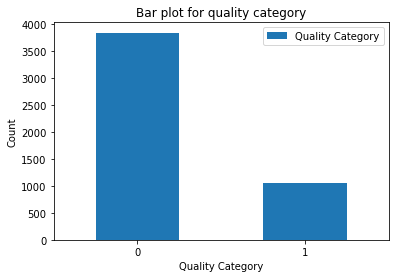

In [8]:
df['Quality_Category'].value_counts().plot(kind='bar')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Bar plot for quality category')
plt.legend(['Quality Category'])

Display scatter plot between volatileacidity & citricacid

Text(0.5, 1.0, 'Volatile Acidity v/s Citric Acid')

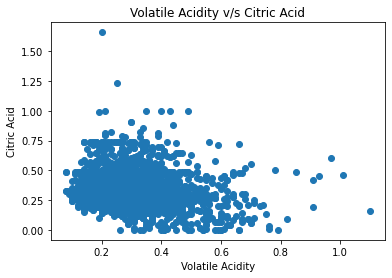

In [9]:
plt.scatter(df['volatileacidity'],df['citricacid'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Citric Acid')
plt.title('Volatile Acidity v/s Citric Acid')

Display scatter plot between residualsugar & chlorides

Text(0.5, 1.0, 'Residual Sugar v/s Chlorides')

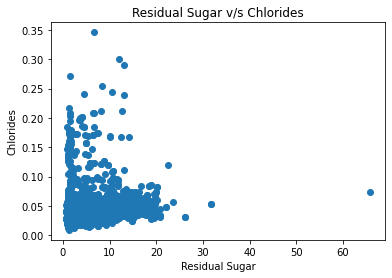

In [10]:
plt.scatter(df['residualsugar'],df['chlorides'])
plt.xlabel('Residual Sugar')
plt.ylabel('Chlorides')
plt.title('Residual Sugar v/s Chlorides')

Display scatterplot between sulphates and alcohol

Text(0.5, 1.0, 'Sulphates v/s Alcohol')

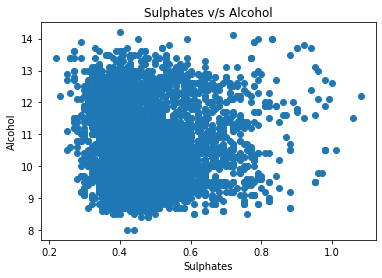

In [11]:
plt.scatter(df['sulphates'],df['alcohol'])
plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Sulphates v/s Alcohol')

Display histplot of dataset

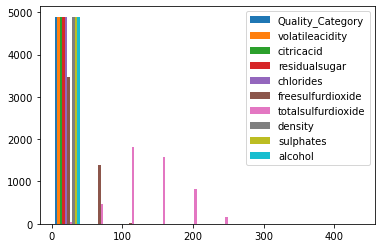

In [12]:
plt.hist(df)
plt.legend(df.columns)
plt.show()

Find the null values

In [13]:
df.isnull().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

# Working with model

Separate features and target data

In [14]:
x = df.drop('Quality_Category',axis=1)
x

volatileacidity  citricacid  residualsugar  chlorides  \
0                0.30        0.34            1.6      0.049   
1                0.23        0.32            8.5      0.058   
2                0.28        0.40            6.9      0.050   
3                0.32        0.16            7.0      0.045   
4                0.27        0.36           20.7      0.045   
...               ...         ...            ...        ...   
4889             0.21        0.29            1.6      0.039   
4890             0.32        0.36            8.0      0.047   
4891             0.24        0.19            1.2      0.041   
4892             0.29        0.30            1.1      0.022   
4893             0.21        0.38            0.8      0.020   

      freesulfurdioxide  totalsulfurdioxide  density  sulphates  alcohol  
0                    14                 132    0.994       0.49      9.5  
1                    47                 186    0.996       0.40      9.9  
2                    30                  97    0.995       0.44     10.1  
3                    30                 136    0.995       0.47      9.6  
4                    45                 170    1.001       0.45      8.8  
...                 ...                 ...      ...        ...      ...  
4889                 24                  92    0.991       0.50     11.2  
4890                 57                 168    0.995       0.46      9.6  
4891                 30                 111    0.993       0.46      9.4  
4892                 20                 110    0.989       0.38     12.8  
4893                 22                  98    0.989       0.32     11.8  

[4894 rows x 9 columns]

In [15]:
y = df[['Quality_Category']]
y

Quality_Category
0                    0
1                    0
2                    0
3                    0
4                    0
...                ...
4889                 0
4890                 0
4891                 0
4892                 1
4893                 0

[4894 rows x 1 columns]

Split into training and testing

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

Apply support vector machine

In [17]:
SVM = SVC()

In [18]:
SVM.fit(x_train,y_train)

SVC()

Show training score

In [19]:
SVM.score(x_train,y_train)

0.7864623243933588

Show the testing score

In [20]:
SVM.score(x_test,y_test)

0.7722165474974464

Show the accuracy

In [21]:
y_pred = SVM.predict(x_test)

In [22]:
accuracy_score(y_test,y_pred)

0.7722165474974464

Create a new model and try it with parameter c = 100

In [23]:
New_SVM = SVC(C=100)

In [24]:
New_SVM.fit(x_train,y_train)

SVC(C=100)

In [25]:
New_SVM.score(x_train,y_train)

0.7864623243933588

In [26]:
New_SVM.score(x_test,y_test)

0.7722165474974464

In [27]:
accuracy_score(y_test,y_pred)

0.7722165474974464